In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Suppressing warnings
The Seaborn library makes calls to several libraries it depends upon, and some of them may throw warnings due to the use of some property which is soon to be deprecated. While Seaborn is expected to update its code base to account for this, we suppress warnings here so that it's not a distraction

#### Download Zomato dataset
Zomato is a restaurant ratings app used around the world (similar to Yelp in the United States).

Source: https://www.kaggle.com/shrutimehta/zomato-restaurants-data

In [2]:
zomato_data = pd.read_csv("../datasets/zomato.csv")

zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### View summary of numerical fields

In [3]:
zomato_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


You decide to do some statistical analysis and plot them on graphs to visualise the price range(We are converting the different price in range from 1 to 4). Graphs are certainly easier to comprehend than a long list of numbers!

Earlier, we tried to combine plots to simultaneously study relationships between pairs of variables - by exploiting the row, column and hue parameters along with lmplot and factorplot, for instance.
Here, let us try to use the exclusive FacetGrid class that comes along with Seaborn. <br>

FacetGrid is a subplot grid for plotting conditional relationships.

FacetGrid is very useful for
* Visualising distributions and relations between variables, within subsets of the concerned dataset.
* As seen before, there are three dimensions along which we observe the data - row, column and hue.

#### How do we use FacetGrid?
* We first initialise a FacetGrid object with a dataframe
* Specify the row, column and hue parameters
* Every unique value of the categorical variable is then used to create a facet along the specified axis.
* A plotting function is applied to each subset by using a map function


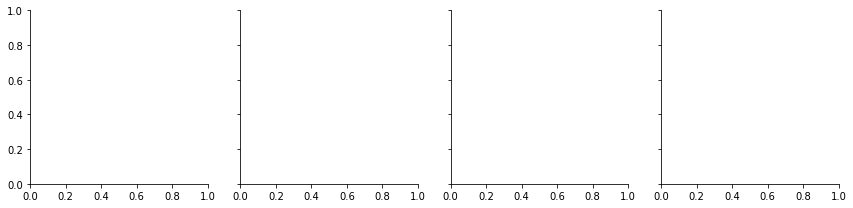

In [4]:
facet = sns.FacetGrid(zomato_data, 
                      col = "Price range")

plt.show()

We see that the matplotlib figure and axes are set up. We now have to map this with a plotting function, which will then be plotted on the above created structure. We will soon see that we can call different plots we have seen so far, alongwith the FacetGrid.

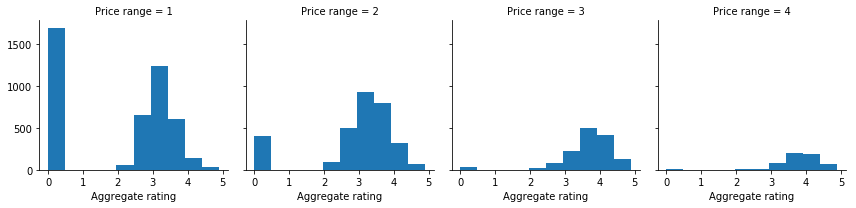

In [5]:
facet = sns.FacetGrid(zomato_data, 
                      col = "Price range")

facet.map(plt.hist, 
          "Aggregate rating")

plt.show()

We have called the plt.hist function to plot a histogram for the aggregating rating for each resturant.

It is clear that restaurants in the price range 1 are the most common. It has the maximum aggregate rating in range 2 to 5. The histogram shows that the aggregate rating  between 2 and 5 has the largest area with compare to other price range, implying highest number of ratings are present in this price range .

#### We now pass multiple variables to make a relational plot.
The scatter plot is used

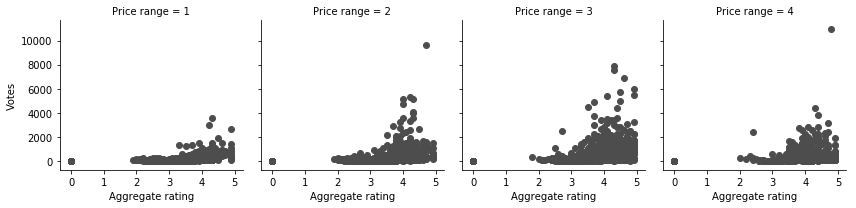

In [6]:
facet = sns.FacetGrid(zomato_data , 
                      col = "Price range")

facet.map(plt.scatter , 
          "Aggregate rating" , 
          "Votes",
           color = "0.3")

plt.show()

We use 'color' argument to set the color as black.If we set the color near to 0 then it shows black shades but as we increase the value going towards 1 it becomes white

#### Use the hue property to convey more information
The data only has the country code for a restaurant's location, and not the name of the country. We use the currency field as a proxy for the country where the restaurant is located. 

The hue property of a FacetGrid will allow us to plot different colored markers for each currency in the restaurant data.

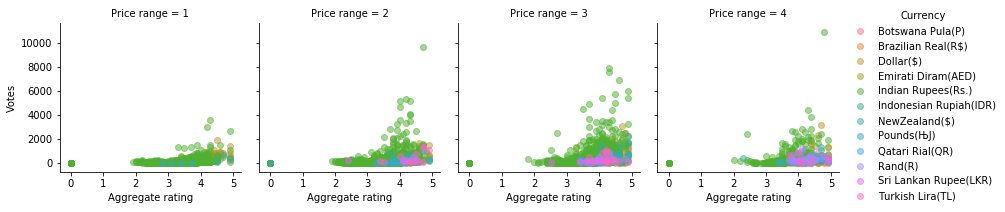

In [7]:
facet = sns.FacetGrid(zomato_data, 
                      col = "Price range" ,
                      hue = "Currency")

facet.map(plt.scatter , 
          "Aggregate rating" , 
          "Votes" ,
           alpha = 0.5)

facet.add_legend()

plt.show()

It's clear that the dataset is dominated by restaurants in India in all price ranges, and there is a strong presence of Turkish restaurants in the higher price ranges.

#### Using a regplot()

* The margin title parameter is made true to add the title for each row
* fit_reg is made false as we do not want to plot a regression line

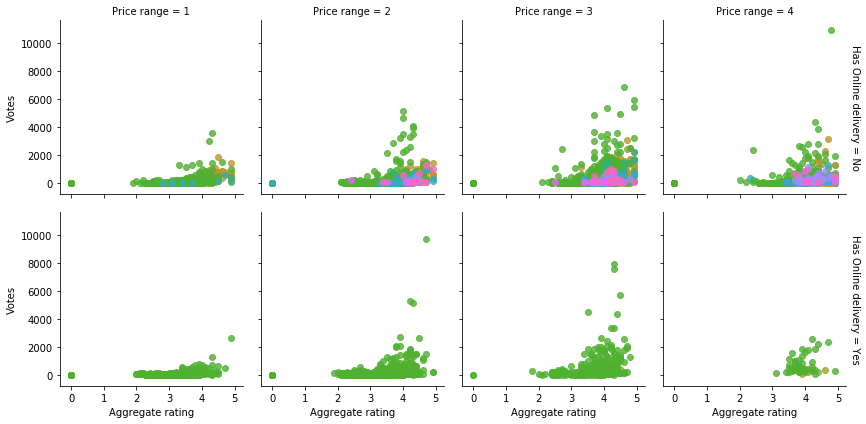

In [8]:
facet = sns.FacetGrid(zomato_data, 
                      row = "Has Online delivery", 
                      col = "Price range", 
                      hue = "Currency", 
                      margin_titles = True)

facet.map(sns.regplot ,
          "Aggregate rating" ,
          "Votes",
           fit_reg = False)

plt.show()

The above fig shows how there are very few Turkish restaurants with online delivery


#### Adjusting the size of individual plots
If we would like to set the sizes for the individual plots, we can use the gridspec_kws parameter to set the width or height of the plots. Here, we set the widths of the subplots and enlarge the plot for the price range of 3.

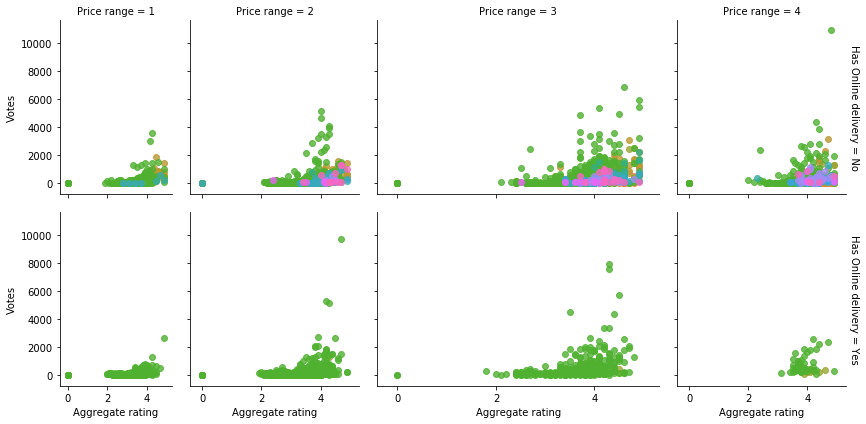

In [9]:
facet = sns.FacetGrid(zomato_data, 
                      row = "Has Online delivery", 
                      col = "Price range", 
                      hue = "Currency", 
                      margin_titles = True,
                      gridspec_kws = dict(width_ratios = [2,3,5,3]))

facet.map(sns.regplot ,
          "Aggregate rating" ,
          "Votes",
           fit_reg = False)

plt.show()

#### Increasing the number of graphs in the grid

Let us plot the same graph for each currency. We will know how the average cost for two people very with country code.

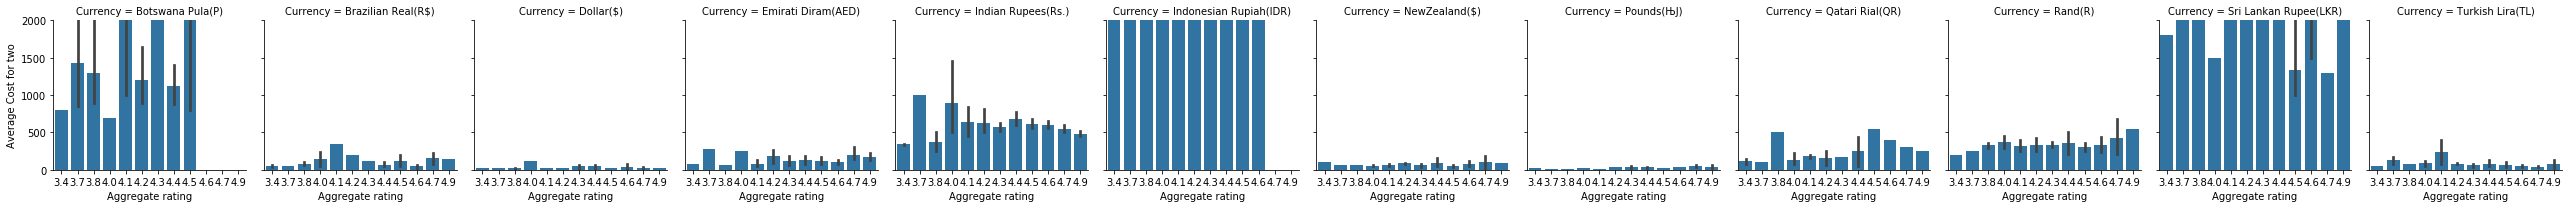

In [10]:
facet = sns.FacetGrid(zomato_data,
                      col = "Currency")

facet.map(sns.barplot,
          "Aggregate rating",
          "Average Cost for two")

plt.ylim(0,2000)

plt.show()

This creates 12 graphs - one for each currency in the dataset. Arranging all of them in the same column makes these graphs impossible to read, but Seaborn offers some control over how the graphs are arranged.

#### Use the col_wrap parameter to set number of columns 
Note that the ylim has cut off some of the bars for some of the currencies

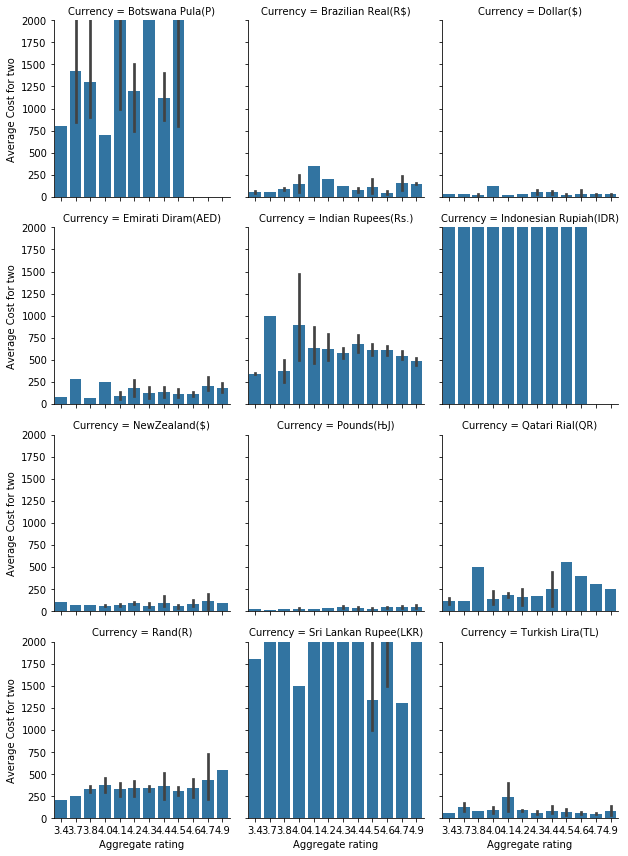

In [11]:
facet = sns.FacetGrid(zomato_data,
                      col = "Currency", 
                      col_wrap = 3)

facet.map(sns.barplot,
          "Aggregate rating",
          "Average Cost for two")

plt.ylim(0,2000)

plt.show()

Average cost for two seem to be high in the Botswana, Indonesia and Sri Lanka, most likely due to the values of their currencies.

We have added the col_wrap parameter and set it to 3. Thus we have 3 columns in every row, and the rest of the entries are carried forward to the next rows. <br>
**Note: The same cannot be applied to the row variable**

## Customising the FacetGrid plots
Let us now try to use other features offered by FacetGrid to customize the appearance of the plots.

**Defining the bars**
* We have specified bar chart colour,aspect ratio,edge colour and line width

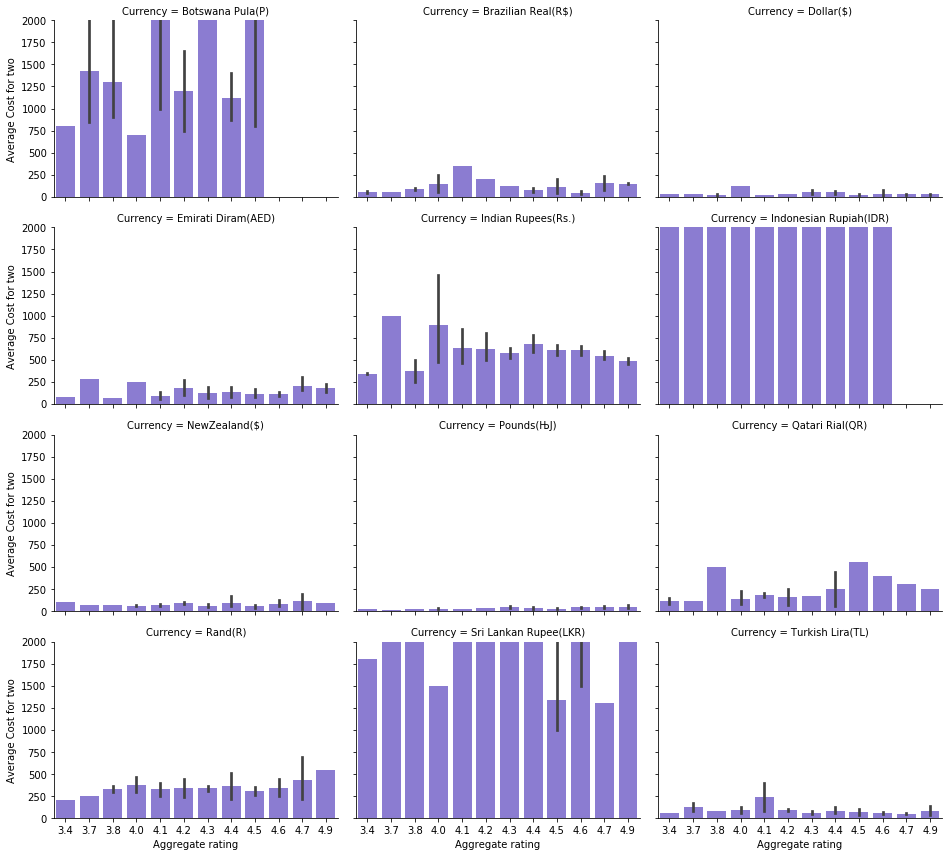

In [12]:
facet = sns.FacetGrid(zomato_data ,
                      col = "Currency" , 
                      col_wrap = 3 , 
                      aspect = 1.5)

facet.map(sns.barplot ,
          "Aggregate rating" ,
          "Average Cost for two",
           color = '#826EDF')

plt.ylim(0,2000)

plt.show()

#### Adjust spacing between plots and setting axes labels

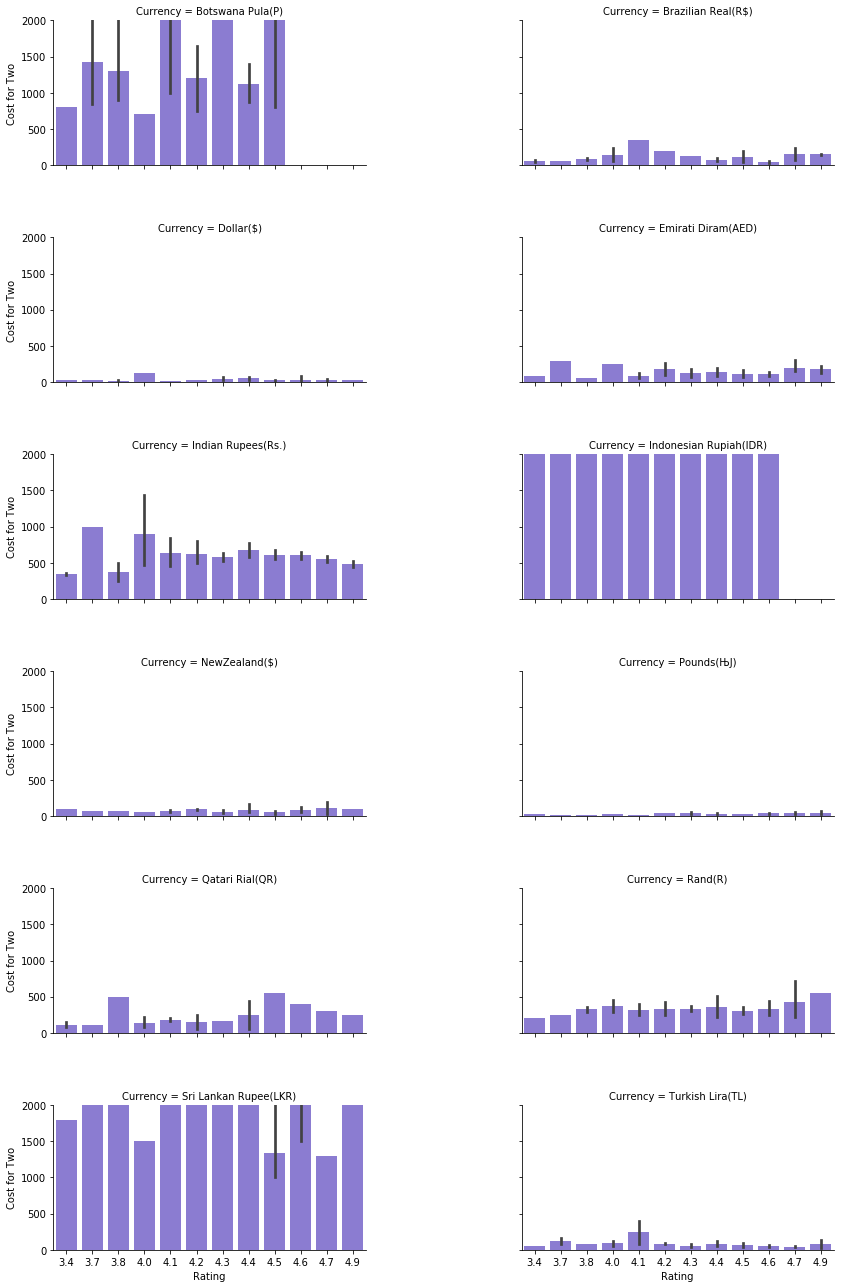

In [13]:
facet = sns.FacetGrid(zomato_data , 
                      col = "Currency" ,
                      col_wrap = 2,
                      aspect = 2)

facet.map(sns.barplot,
          "Aggregate rating",
          "Average Cost for two",
           color = '#826EDF')

facet.fig.subplots_adjust(wspace = 0.5,
                          hspace = 0.5)

facet.set_axis_labels("Rating",
                      "Cost for Two")


plt.ylim(0,2000)

plt.show()